# Cleaning Data with Pandas Exercises

For the exercises, you will be cleaning data in the Women's Clothing E-Commerce Reviews dataset.

**Dataset Information:**
- **Dataset Name:** Women's Clothing E-Commerce Reviews
- **File:** `Womens Clothing E-Commerce Reviews.csv`
- **Source:** This dataset contains reviews written by customers and includes features like ratings, review text, product categories, and customer information.

To start cleaning data, we first need to create a dataframe from the CSV and print out any relevant info to make sure our dataframe is ready to go.

In [ ]:
# Import pandas and any other libraries you need here.

import pandas as pd

# Create a new dataframe from your CSV
df = pd.read_csv("Womens Clothing E-Commerce Reviews.csv")

In [ ]:
# Print out any information you need to understand your dataframe
print(df.info())
print(df.head())

## Missing Data

Try out different methods to locate and resolve missing data.

In [3]:
# Try to find some missing data!
import pandas as pd

df = pd.read_csv("Womens Clothing E-Commerce Reviews.csv")
df.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

Did you find any missing data? What things worked well for you and what did not?

In [ ]:
# Respond to the above questions here:

Yes, I found missing data in multiple columns. 
The Title column has 3,810 missing values. 
Review Text has 845 missing values.

Using df.isnull().sum() worked well to identify missing data.

I feel dropping all rows with missing values will not work well as it will remove too many entries.
But I can decide on dropping the Title column or I can decide on filling in missing category values with "Unknown".

## Irregular Data

With missing data out of the way, turn your attention to any outliers. Just as we did for missing data, we first need to detect the outliers.

In [5]:
# Keep an eye out for outliers!
import pandas as pd

df = pd.read_csv("Womens Clothing E-Commerce Reviews.csv")
df.describe()

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,11742.500000,918.118709,43.198544,4.196032,0.822362,2.535936
std,6779.968547,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000
25%,5871.250000,861.000000,34.000000,4.000000,1.000000,0.000000
50%,11742.500000,936.000000,41.000000,5.000000,1.000000,1.000000
75%,17613.750000,1078.000000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000


What techniques helped you find outliers? In your opinion, what about the techniques you used made them effective?

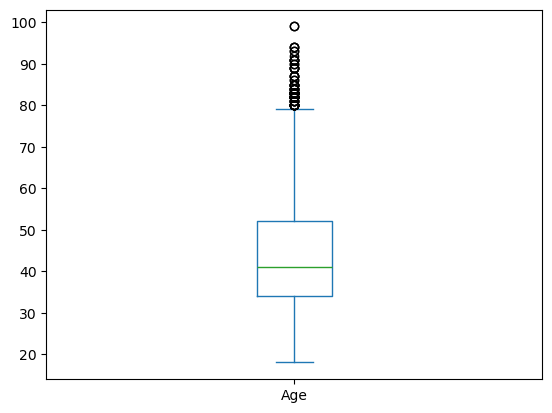

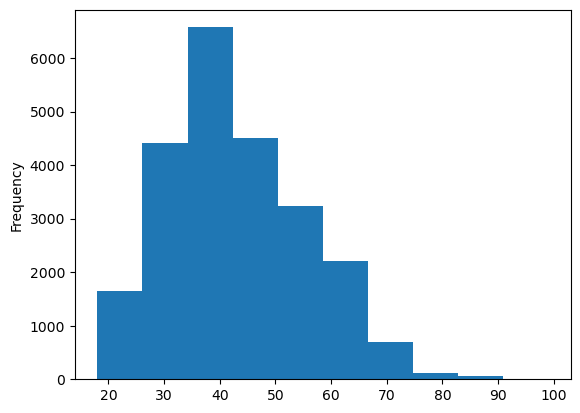

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,11742.500000,918.118709,43.198544,4.196032,0.822362,2.535936
std,6779.968547,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000
25%,5871.250000,861.000000,34.000000,4.000000,1.000000,0.000000
50%,11742.500000,936.000000,41.000000,5.000000,1.000000,1.000000
75%,17613.750000,1078.000000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000


In [17]:
# Make your notes here:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Womens Clothing E-Commerce Reviews.csv")

df['Age'].plot.box()
plt.show()


df['Age'].plot.hist()
plt.show()


Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['Age'] < Q1 - 1.5*IQR) | (df['Age'] > Q3 + 1.5*IQR)]
(df.describe())


## Unnecessary Data

Unnecessary data could be irrelevant to your analysis or a duplicate column. Check out the dataset to see if there is any unnecessary data.

In [23]:
# Look out for unnecessary data!

df.duplicated().any()
df.info()
df = df.drop(columns=["Unnamed: 0"])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


Did you find any unnecessary data in your dataset? How did you handle it?

In [31]:
# Make your notes here.
I checked for duplicates in the data, and there were none. So I checked the whole data structure.
Later, found an unnamed column which I decided to drop using the drop syntax.


SyntaxError: invalid syntax (3272334279.py, line 2)

## Inconsistent Data

Inconsistent data is likely due to inconsistent formatting and can be addressed by re-formatting all values in a column or row.

In [44]:
# Look out for inconsistent data!
df.columns
df['Division Name'].unique()


df['Department Name'].unique()

df['Class Name'].unique()


array(['Intimates', 'Dresses', 'Pants', 'Blouses', 'Knits', 'Outerwear',
       'Lounge', 'Sweaters', 'Skirts', 'Fine gauge', 'Sleep', 'Jackets',
       'Swim', 'Trend', 'Jeans', 'Legwear', 'Shorts', 'Layering',
       'Casual bottoms', nan, 'Chemises'], dtype=object)

Did you find any inconsistent data? What did you do to clean it?

In [46]:
# Make your notes here!

Yes all below columns had different spellings and capitalization, along with Trailing spaces and Missing values in categories.
    


SyntaxError: invalid syntax (2233279952.py, line 3)

In [ ]:
Checked for Spaces.

In [72]:

df['Division Name'].str.strip().unique()
df['Department Name'].str.strip().unique()
df['Class Name'].str.strip().unique()

array(['Intimates', 'Dresses', 'Pants', 'Blouses', 'Knits', 'Outerwear',
       'Lounge', 'Sweaters', 'Skirts', 'Fine Gauge', 'Sleep', 'Jackets',
       'Swim', 'Trend', 'Jeans', 'Legwear', 'Shorts', 'Layering',
       'Casual Bottoms', 'Unknown', 'Chemises'], dtype=object)

In [ ]:
Checked for capitalization inconsistencies

In [ ]:
df['Class Name'] = df['Class Name'].str.strip().str.title()
df['Division Name'] = df['Division Name'].str.strip().str.title()

df['Department Name'] = df['Department Name'].replace({
    'Intimate': 'Intimates'
})

In [ ]:
Identify inconsistency in values.

In [52]:
df['Division Name'].value_counts()
df['Department Name'].value_counts()
df['Class Name'].value_counts()


Class Name
Dresses           6319
Knits             4843
Blouses           3097
Sweaters          1428
Pants             1388
Jeans             1147
Fine gauge        1100
Skirts             945
Jackets            704
Lounge             691
Swim               350
Outerwear          328
Shorts             317
Sleep              228
Legwear            165
Intimates          154
Layering           146
Trend              119
Casual bottoms       2
Chemises             1
Name: count, dtype: int64

In [ ]:
df['Class Name'] = df['Class Name'].replace({
    'Casual bottoms': 'Pants',
    'Chemises': 'Sleep'
})

In [ ]:
I replaced casual bottoms and Chemises which is low appearing category to be included in the high-appearing category such as pants and Sleep.

In [ ]:
I replaced nan with unknown. 

In [54]:

df = df.fillna({
    'Division Name': 'Unknown',
    'Department Name': 'Unknown',
    'Class Name': 'Unknown',
    'Title': 'Unknown',
    'Review Text': 'Unknown'
})